# TripleTen, Proyecto Final, Prueba A/B

## Introducción

Has recibido una tarea analítica de una tienda en línea internacional. Tus predecesores no consiguieron completarla: lanzaron una prueba A/B y luego abandonaron (para iniciar una granja de sandías en Brasil). Solo dejaron las especificaciones técnicas y los resultados de las pruebas.

**Objetivo:** Descarga los datos de la prueba, comprueba si se ha realizado correctamente y analiza los resultados.

**Pasos para completar la tarea:**
- Explorar los datos y preprocesarlos
- Llevar a cabo el análisis exploratorio de datos
- Evaluar los resultados de la prueba A/B
- Describe tus conclusiones con respecto a la etapa EDA y los resultados de la prueba A/B

**Detalles y Descripción téctina de la prueba A/B:**

- Nombre de la prueba: recommender_system_test
- Grupos: А (control), B (nuevo embudo de pago)
- Launch date: 2020-12-07
- Fecha en la que dejaron de aceptar nuevos usuarios: 2020-12-21
- Fecha de finalización: 2021-01-01
- Audiencia: 15% de los nuevos usuarios de la región de la UE
- Propósito de la prueba: probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado
- Resultado esperado: dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto (el evento product_page), instancias de agregar artículos al carrito de compras (product_card) y compras (purchase). En cada etapa del embudo product_page → product_card → purchase, habrá al menos un 10% de aumento.
- Número previsto de participantes de la prueba: 6 000

**Descripción de los datos y archivos:**

- `ab_project_marketing_events_us.csv`: el calendario de eventos de marketing para 2020

        - `name`: el nombre del evento de marketing
        - `regions`: regiones donde se llevará a cabo la campaña publicitaria
        - `start_dt`: fecha de inicio de la campaña
        - `finish_dt`: fecha de finalización de la campaña

- `final_ab_new_users_upd_us.csv`: todos los usuarios que se registraron en la tienda en línea desde el 7 hasta el 21 de diciembre de 2020

        - `user_id`: identificador único de usuario
        - `first_date`: fecha de inscripción
        - `region`: region de donde se ha inscrito el usuario
        - `device`: dispositivo utilizado para la inscripción


- `final_ab_events_upd_us.csv`: todos los eventos de los nuevos usuarios en el período comprendido entre el 7 de diciembre de 2020 y el 1 de enero de 2021

        - `user_id`: identificador único de usuario
        - `event_dt`: fecha y hora del evento
        - `event_name`: nombre del tipo de evento
        - `details`: datos adicionales sobre el evento (por ejemplo, el pedido total en USD para los eventos `purchase`)


- `final_ab_participants_upd_us.csv`: tabla con los datos de los participantes de la prueba

        - `user_id`: identificador único de usuario
        - `ab_test`: nombre de la prueba
        - `group`: el grupo de prueba al que pertenecía el usuario


## Parte 1: Descargar paquetes y librerías

In [2]:
import pandas as pd
import numpy as np
import math as mth
import seaborn as sns
from matplotlib import pyplot as plt
from plotly import graph_objects as go
from scipy import stats as st

## Parte 2: Guardar los datasets y preprocesamiento de los datos

In [3]:
# guardamos los archivos 

ab_project_marketing_events_us = pd.read_csv(r"C:\Users\david\Documents\Programacion\Practicum - Data Analyst\TripleTen-Final-Project\AB\ab_project_marketing_events_us.csv")

final_ab_participants_upd_us = pd.read_csv(r"C:\Users\david\Documents\Programacion\Practicum - Data Analyst\TripleTen-Final-Project\AB\final_ab_participants_upd_us.csv")

final_ab_new_users_upd_us = pd.read_csv(r"C:\Users\david\Documents\Programacion\Practicum - Data Analyst\TripleTen-Final-Project\AB\final_ab_new_users_upd_us.csv")

final_ab_events_upd_us = pd.read_csv(r"C:\Users\david\Documents\Programacion\Practicum - Data Analyst\TripleTen-Final-Project\AB\final_ab_events_upd_us.csv")

In [4]:
# observamos los tipos de datos y si hay ausentes

print('Observación de datos del dataset ab_project_marketing_events_us:')
display(ab_project_marketing_events_us.head(5))
ab_project_marketing_events_us.info()

print('\nObservación de datos del dataset final_ab_participants_upd_us:')
display(final_ab_participants_upd_us.head(5))
final_ab_participants_upd_us.info()

print('\nObservación de datos del dataset final_ab_new_users_upd_us:')
display(final_ab_new_users_upd_us.head(5))
final_ab_new_users_upd_us.info()

print('\nObservación de datos del dataset final_ab_events_upd_us:')
display(final_ab_events_upd_us.head(5))
final_ab_events_upd_us.info()

Observación de datos del dataset ab_project_marketing_events_us:


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes

Observación de datos del dataset final_ab_participants_upd_us:


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB

Observación de datos del dataset final_ab_new_users_upd_us:


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB

Observación de datos del dataset final_ab_events_upd_us:


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [4]:
# conversión de tipos de datos

# conversion a datetime de las columnas start_dt y finish_dt del dataset ab_project_marketing_events_us
ab_project_marketing_events_us['start_dt'] = pd.to_datetime(ab_project_marketing_events_us['start_dt'], format="%Y-%m-%d")
ab_project_marketing_events_us['finish_dt'] = pd.to_datetime(ab_project_marketing_events_us['finish_dt'], format="%Y-%m-%d")

# conversion a datetime de las columna first_date del dataset final_ab_new_users_upd_us
final_ab_new_users_upd_us['first_date'] = pd.to_datetime(final_ab_new_users_upd_us['first_date'], format="%Y-%m-%d")

# conversion a datetime de las columna event_dt del dataset final_ab_events_upd_us
final_ab_events_upd_us['event_dt'] = pd.to_datetime(final_ab_events_upd_us['event_dt'], format="%Y-%m-%d %H:%M:%S")

In [5]:
# analizar valores ausentes

# visualizar los datos del dataset final_ab_events_upd_us donde hay valores ausentes en la columna details

display(final_ab_events_upd_us[final_ab_events_upd_us['details'].isna() == True].head(5))

# visualizar los tipos de eventos donde la columna details es ausente

display(final_ab_events_upd_us[final_ab_events_upd_us['details'].isna() == True]['event_name'].unique())

,user_id,event_dt,event_name,details
60314,2E1BF1D4C37EA01F,2020-12-07 09:05:47,product_cart,NaN
60315,50734A22C0C63768,2020-12-07 13:24:03,product_cart,NaN
60316,5EB159DA9DC94DBA,2020-12-07 22:54:02,product_cart,NaN
60317,084A22B980BA8169,2020-12-07 15:25:55,product_cart,NaN
60318,0FC21E6F8FAA8DEC,2020-12-07 06:56:27,product_cart,NaN


array(['product_cart', 'product_page', 'login'], dtype=object)

In [6]:
# checar por duplicados

print('Filas duplicadas en dataset ab_project_marketing_events_us:')
display(ab_project_marketing_events_us[ab_project_marketing_events_us.duplicated() == True])

print('Filas duplicadas en dataset final_ab_participants_upd_us:')
display(final_ab_participants_upd_us[final_ab_participants_upd_us.duplicated() == True])

print('Filas duplicadas en dataset final_ab_new_users_upd_us:')
display(final_ab_new_users_upd_us[final_ab_new_users_upd_us.duplicated() == True])

print('Filas duplicadas en dataset final_ab_events_upd_us:')
display(final_ab_events_upd_us[final_ab_events_upd_us.duplicated() == True])


Filas duplicadas en dataset ab_project_marketing_events_us:


,name,regions,start_dt,finish_dt


Filas duplicadas en dataset final_ab_participants_upd_us:


,user_id,group,ab_test


Filas duplicadas en dataset final_ab_new_users_upd_us:


,user_id,first_date,region,device


Filas duplicadas en dataset final_ab_events_upd_us:


,user_id,event_dt,event_name,details


*Hallazgos de la sección:* 

Hemos convertido las fechas de nuestros data sets a datos del tipo datetime. También notamos que no hay casos de filas idénticas en ninguno de los data sets. Respecto a los valores ausentes, es algo que se presenta únicamente en la columna 'details' del data set final_ab_events_upd_us, sin embargo es algo esperado según la descripción de la prueba que nos han dado al comienzo. Hemos comprobado de todas maneras, que estos ausentes solamente corresponden a filas que tienen como valor en la columna 'event_name' : 'product_cart', 'product_page', 'login' 

## Parte 3: Análisis exploratorio de datos (EDA)

### Distribución equitativa

¿El número de eventos por usuario está distribuido equitativamente entre las muestras?

In [7]:
# analizamos la division de participantes del dataset final_ab_participants_upd_us

display(final_ab_participants_upd_us.groupby(['ab_test','group']).nunique())

user_id
ab_test                 group         
interface_eu_test       A         5467
                        B         5383
recommender_system_test A         2747
                        B          928

In [8]:
# ¿Hay usuarios que están presentes en ambas muestras?

# separar los usuarios que son de la prueba que nos interesa: recommender_system_test
users_recommender_system_test = final_ab_participants_upd_us[final_ab_participants_upd_us['ab_test'] == 'recommender_system_test']

# separamos los usuarios de cada grupo A y B
users_recommender_system_test_a = users_recommender_system_test[users_recommender_system_test['group'] == 'A']
users_recommender_system_test_b = users_recommender_system_test[users_recommender_system_test['group'] == 'B']

# testeamos si hay usuarios en ambas muestras
print('De la prueba AB recommender_system_test')
print('Hay usuarios del grupo A en el grupo B? ', users_recommender_system_test_a['user_id'].isin(users_recommender_system_test_b['user_id']).unique())
print('Hay usuarios del grupo B en el grupo A? ', users_recommender_system_test_b['user_id'].isin(users_recommender_system_test_a['user_id']).unique())

De la prueba AB recommender_system_test
Hay usuarios del grupo A en el grupo B?  [False]
Hay usuarios del grupo B en el grupo A?  [False]


In [9]:
# juntamos datos de final_ab_events_upd_us y users_recommender_system_test en un nuevo dataset: events_df

events_df = final_ab_events_upd_us.merge( users_recommender_system_test, how='left' , on = 'user_id'  )

events_df    

# a este punto, events_df contiene todos los eventos registrados, con información de grupo A o B de solo usuarios de la prueba recommender_system_test

,user_id,event_dt,event_name,details,group,ab_test
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,NaN,NaN
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,NaN,NaN
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,NaN,NaN
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,NaN,NaN
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,NaN,NaN
...,...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN,NaN,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN,NaN,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN,NaN,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN,NaN,NaN


In [13]:
# removemos las filas donde 'group' se ha quedado como NaN, para asi tener eventos registrados
# de unicamente los usuarios que fueron asignados a la prueba recommender_system_test

events_df = events_df.dropna(subset=['group'])

# ahora añadimos datos de region desde el dataset final_ab_new_users_upd_us para quedarnos con solo usuarios de EU

#events_df = events_df.merge(final_ab_new_users_upd_us, how='left', on= 'user_id')
events_df = events_df[events_df['region'] == 'EU']

events_df.head()

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-12-07,EU,Android
1,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,A,recommender_system_test,2020-12-07,EU,PC
2,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99,B,recommender_system_test,2020-12-07,EU,iPhone
3,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,4.99,A,recommender_system_test,2020-12-07,EU,PC
4,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99,B,recommender_system_test,2020-12-07,EU,PC


### Conversión de etapas - embudo

Estudia la conversión en las diferentes etapas del embudo

In [44]:
# Trazamos embudo de las etapas, todos los usuarios

print('Embudo de cantidad de eventos registrados (A y B):')

events_funnel = events_df.groupby('event_name')['user_id'].count().sort_values(ascending = False)
events_funnel = events_funnel.reset_index()
events_funnel = events_funnel.rename(columns = {'user_id':'total_events'}) 

# events_funnel

fig_events_funnel = go.Figure(
    go.Funnel(
        y = events_funnel['event_name'],
        x = events_funnel['total_events'],
    )
)

fig_events_funnel.show()

Embudo de cantidad de eventos registrados (A y B)


In [15]:
# Trazamos embudo de las etapas, usuarios del grupo A

print('Embudo de cantidad de eventos registrados (A):')

events_funnel_A = events_df[events_df['group'] == 'A'].groupby('event_name')['user_id'].count().sort_values(ascending = False)
events_funnel_A = events_funnel_A.reset_index()
events_funnel_A = events_funnel_A.rename(columns = {'user_id':'total_events'}) 

# events_funnel

fig_events_funnel_A = go.Figure(
    go.Funnel(
        y = events_funnel_A['event_name'],
        x = events_funnel_A['total_events']
    )
)

fig_events_funnel_A.show()


In [16]:
# Trazamos embudo de las etapas, usuarios del grupo B

print('Embudo de cantidad de eventos registrados (B):')

events_funnel_B = events_df[events_df['group'] == 'B'].groupby('event_name')['user_id'].count().sort_values(ascending = False)
events_funnel_B = events_funnel_B.reset_index()
events_funnel_B = events_funnel_B.rename(columns = {'user_id':'total_events'}) 

# events_funnel

fig_events_funnel_B = go.Figure(
    go.Funnel(
        y = events_funnel_B['event_name'],
        x = events_funnel_B['total_events']
    )
)

fig_events_funnel_B.show()

### Cantidad de eventos por día 

¿Cómo se distribuye el número de eventos entre los días?

In [17]:
# añadimos columna de fecha sin incluir la hora a events_df
events_df['event_day'] = events_df['event_dt'].dt.date

<Axes: title={'center': 'Cantidad de eventos registrados por día \n Fechas: 2020-12-07 a 2020-12-30'}, xlabel='event_day', ylabel='event_name'>

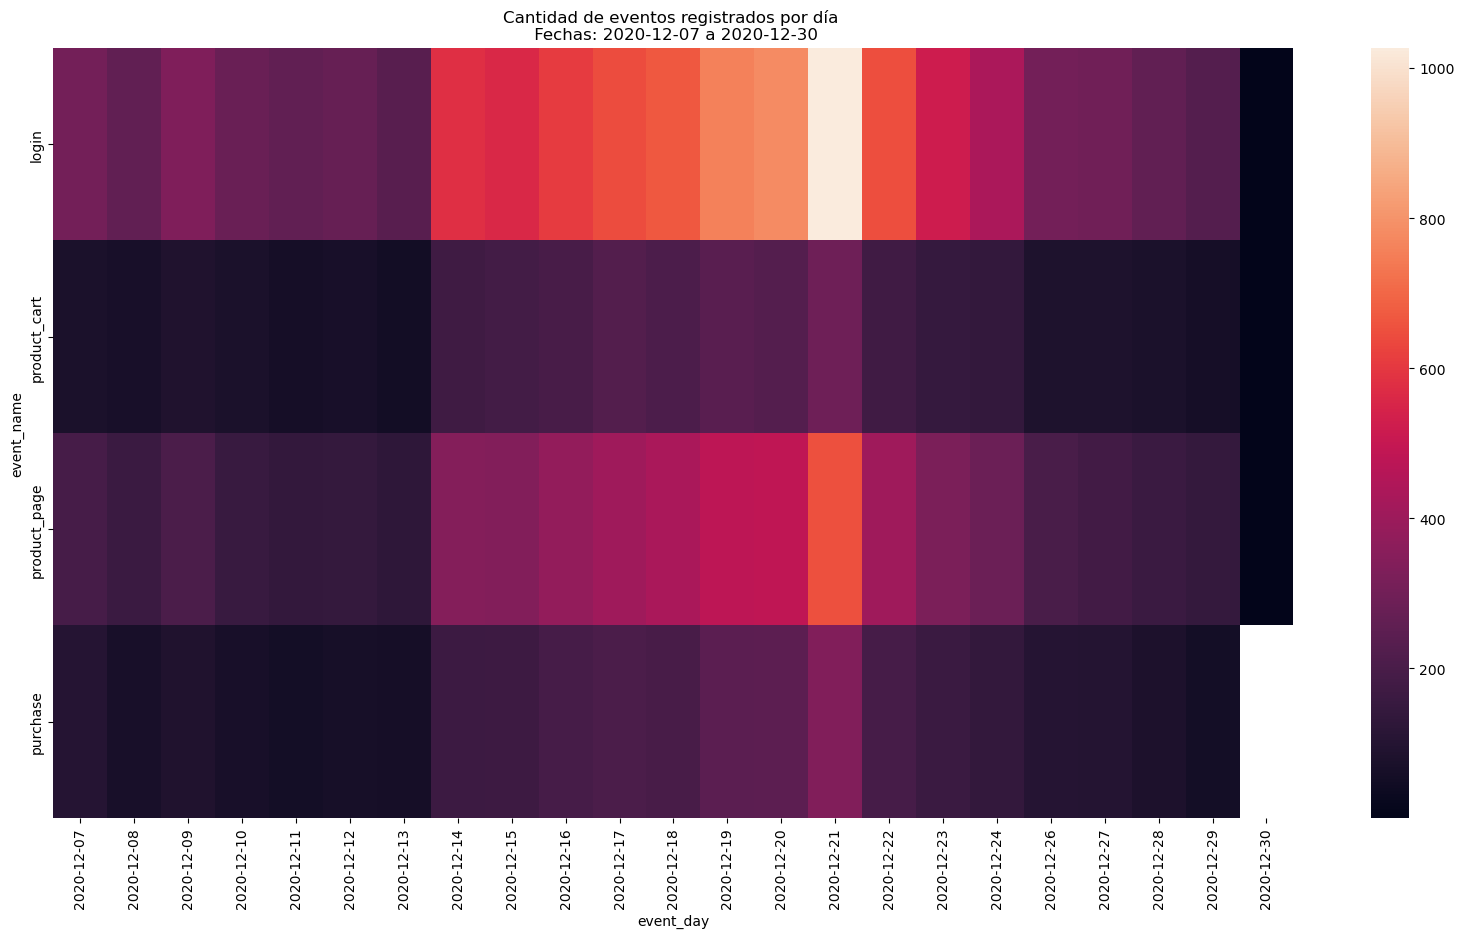

In [45]:
# Trazamos pivot table a partir de events_df

pivot_table_all = events_df.pivot_table(
    index =  'event_name',
    columns = 'event_day' ,
    values = 'user_id'  ,
    aggfunc = 'count'
)

plt.figure(figsize=(20,10))
plt.title('Cantidad de eventos registrados por día \n Fechas: 2020-12-07 a 2020-12-30')

sns.heatmap(
    pivot_table_all,
    annot = False,
    linecolor = 'gray'
)

### Duración de la prueba

Estabilidad de la inscripción de nuevos usuarios de la region EU

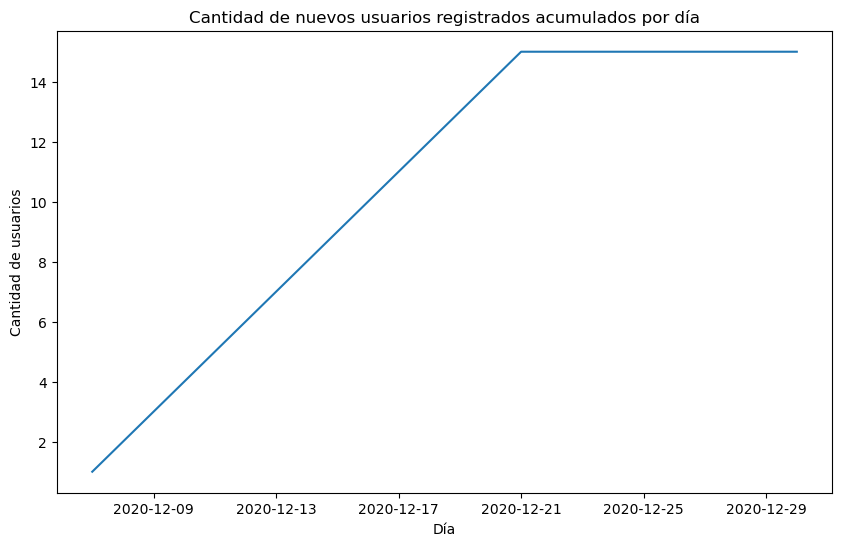

In [51]:
datesGroups = events_df[['event_day','group']].drop_duplicates()

usersAggregated = datesGroups.apply(
    lambda x: events_df[np.logical_and(events_df['event_day'] <= x['event_day'], events_df['group'] == x['group'])].agg({
        'event_day' : 'max',
        'group' : 'max',
        'first_date' : pd.Series.nunique,
        'details' : 'sum'}), axis=1).sort_values(by=['event_day','group'])

plt.figure(figsize=(10,6))

plt.plot(
    usersAggregated['event_day'], 
    usersAggregated['first_date']
)


plt.title('Cantidad de nuevos usuarios registrados acumulados por día')
plt.xlabel('Día')
plt.ylabel('Cantidad de usuarios')
plt.show()

### Valores atípicos

¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?
¿Cuántos eventos suele hacer un usuario?

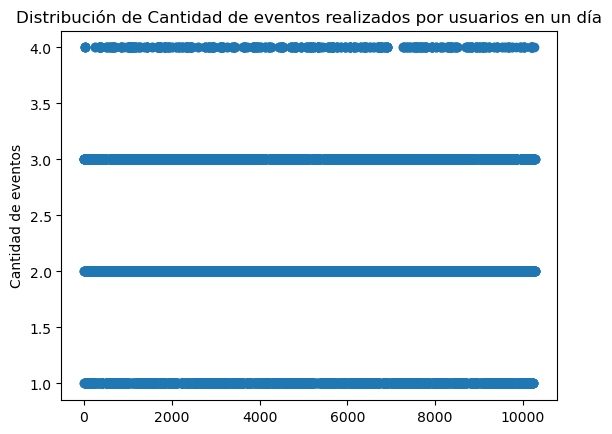

In [54]:
# a partir de events_df, calcula cantidad de eventos por usuario, por día

user_events_count = events_df[['user_id','event_name','event_day']].groupby(['user_id','event_day']).count()
user_events_count = user_events_count.reset_index()

# trazamos gráfico de dispersión

x_values = pd.Series(range(0,len(user_events_count)))
plt.scatter(
    x_values,
    user_events_count['event_name']
)

plt.title('Distribución de Cantidad de eventos realizados por usuarios en un día')
plt.ylabel('Cantidad de eventos')
plt.show()


In [30]:
# calcular percentil 95 y 99 de la cantidad de eventos que un usuario unico realiza

print(np.percentile(user_events_count['event_name'], [95,99]))

[4. 4.]


In [31]:
print('Cantidad de usuarios con comportamiento anómalo (realizar 4 eventos o más en un solo día):')
len(user_events_count[user_events_count['event_name'] == 4])

Cantidad de usuarios con comportamiento anómalo (realizar 4 pedidos o más en un solo día):


622

*Hallazgos de la sección:* 

- Hay dos tests A/B registrados: interface_eu_test y recommender_system_test. Nos han dicho que el test que nos interesa analizar es recommender_system_test, así que nos hemos filtrado los datos para remover los datos asociados con el test interface_eu_test
- Los grupos del test recommender_system_test no tienen una distribución equitativa de usuarios unicos en los grupos A y B. 
- No hemos encontrado que hayan usuarios que estén en ambos grupos
- Hemos utilizado el método merge() para quedarnos con los usarios de la región EU, ya que segun las instrucciones de la tarea, estos son los usuarios de interés en la Hipótesis
- El embudo trazado para los usuarios del grupo A, muestran una conversión del 13.8 % del total de usuarios que llegaron a la etapa 'purchase', mientras que los usuarios del grupo B muestran una conversión del 13% del total de usuarios. Una diferencia entre grupos de 0.8 % 
- Los usuarios del grupo A que llegaron a la etapa 'purchase', representan el 48.2% de la etapa anterior. Los usuarios del grupo B  que llegaron a la etapa 'purchase', representan el 50% de la etapa anterior.  Una diferencia entre grupos de 1.8%
- De el mapa de calor trazado para la cantidad de eventos por día, hay claro aumento en la actividad de los usuarios desde el 14 hasta el 21 de diciembre, y después la actividad vuelve a bajar. Lo más probable es que este comportamiento ha sido fuertemente influenciado por la festividad de Navidad. 
- Hemos trazado un gráfico para observar si los usuarios que se incriben se ha estabilizado dentro del periodo dado 7-12 al 21-12- No ha sido el caso.
- Hemos identificado como valores atípicos, cuando un usuario ha realizado más de 4 eventos en un mismo día. 


## Parte 4: Evaluar los resultados de la prueba A/B

¿Qué puedes decir sobre los resultados de la prueba A/B? Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones

Utilizaremos una prueba Z para los datos en bruto, y luego para los datos filtrados (removiendo los usuarios que realizaron más de 4 eventos en un mismo día). 

Nuestra hipótesis nula es que no hay diferencia estadísticamente significativa entre las pruebas. Establecemos un alpha de 0.5 para nuestra prueba. 

#### Datos en bruto

In [32]:
# prueba z para comprobar la diferencia estadística entre las proporciones, datos en bruto

# encontramos total de usuarios unicos en cada grupo
print('total de usuarios unicos en cada grupo:')
print(events_df.groupby('group')['user_id'].nunique())

# encontramos total de evento 'purchase' por grupo
print("\ntotal de evento 'purchase' por grupo:")
print(events_df[events_df['event_name'] == 'purchase'].groupby('group')['event_name'].count())

total de usuarios unicos en cada grupo:
group
A    2604
B     877
Name: user_id, dtype: int64

total de evento 'purchase' por grupo:
group
A    2430
B     649
Name: event_name, dtype: int64


In [33]:
alpha = .05 # nivel de significación

purchases = np.array([2430,649])
n_users = np.array([2604, 877])

p1 = purchases[0]/n_users[0]

p2 = purchases[1]/n_users[1]

p_combined = (purchases[0] + purchases[1]) / (n_users[0] + n_users[1])

difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/n_users[0] + 1/n_users[1]))

distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)

if (p_value < alpha):
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")


p-value:  0.0
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones


#### Datos filtrados (remover datos atípicos)

In [34]:
# prueba z para comprobar la diferencia estadística entre las proporciones, datos filtrados

# filtramos datos atípicos
list_of_abnormal_users = user_purchases_count[user_purchases_count['event_name'] == 4]['user_id']
events_df_filtered = events_df.query("user_id not in @list_of_abnormal_users")

# encontramos total de usuarios unicos en cada grupo
print('total de usuarios unicos en cada grupo:')
print(events_df_filtered.groupby('group')['user_id'].nunique())

# encontramos total de evento 'purchase' por grupo
print("\ntotal de evento 'purchase' por grupo:")
print(events_df_filtered[events_df_filtered['event_name'] == 'purchase'].groupby('group')['event_name'].count())


total de usuarios unicos en cada grupo:
group
A    2434
B     831
Name: user_id, dtype: int64

total de evento 'purchase' por grupo:
group
A    1926
B     529
Name: event_name, dtype: int64


In [35]:
purchases_filtered = np.array([1926,529])
n_users_filtered = np.array([2434, 831])

p1_f = purchases_filtered[0]/n_users_filtered[0]

p2_f = purchases_filtered[1]/n_users_filtered[1]

p_combined_f = (purchases_filtered[0] + purchases_filtered[1]) / (n_users_filtered[0] + n_users_filtered[1])

difference_f = p1_f - p2_f

z_value_f = difference_f / mth.sqrt(p_combined_f * (1 - p_combined_f) * (1/n_users_filtered[0] + 1/n_users_filtered[1])) 

p_value_f = (1 - distr.cdf(abs(z_value_f))) * 2

print('p-value de datos filtrados: ', p_value_f)

if (p_value_f < alpha):
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")

p-value de datos filtrados:  0.0
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones


## Parte 5: Conclusiones finales

**Hallazgos**

- No hay mucha claridad sobre de que se trata esta otra prueba llamada interface_eu_test que aparece en los archivos, asi que la hemos retirado del analisis para mayor precisión en la tarea que se nos ha pedido. 
- Las proporciones de usuarios en el grupo A y grupo B de la prueba recommended_system_test no es equitativa. Esto ya nos alerta que es posible que los resultados de la prueba no sean del todo confiables. 
- De acuerdo a los embudos, si que hay una mejora en cantidad de eventos donde prueba B lo hace mejor, pero es una diferencia bastante poca del 1% al 2% entre las etapas. No llega a una mejora del 10% como se estimaba.
- Respecto a la estacionalidad, de acuerdo al mapa de calor que hemos hecho, la cercanía a un evento como Navidades puede resultar en cambios en el comportamiento de los usuarios que no están únicamente relacionados al sistema de recomendaciones.
- A partir de más de 4 pedidos por cliente en un mismo día, consideramos el dato anómalo, así que hemos retirado estos usuarios del análisis.
- La prueba probablemente no ha durado lo suficiente. Dice que como resultado esperado, en 14 días posteriores a la inscripción de los nuevos usuarios es que notaríamos una diferencia significativa, sin embargo, la prueba acaba el primero de enero, mientras que el último usuario registrado es de fecha 21 de diciembre. Para estos usuarios registrados en el último día del límite, no se ha dado suficiente tiempo para que su comportamiento madure de acuerdo a la expectativa. 
- De acuerdo a las pruebas de significancia estadística, no podemos decir que hay una diferencia estadística entre las proporciones de cada grupo de la prueba.

Finalmente, no podemos recomendar confiar en los resultados de esta prueba A/B, y sin embargo, si fueramos a tomar decisiones basadas en estos resultados, no hemos podido afirmar que el nuevo sistema de recomendaciones mejorado realmente signifique una mejora del 10% en las diferentes etapas del embudo de compras.

Recomendamos, bien sea volver a realizar una prueba A/B con una división de usuarios equitativa, de mayor duración y que no coincida con una festividad; o de no realizar otra prueba, no recomendamos mover hacia adelante la implementación de el sistema de recomendación mejorado, ya que no disponemos de data que respalde la hipotesis inicial. 

<div class="alert alert-block alert-info">
<b> Preguntas que me gustaría hacer de antemano, en caso de no aprobar la entrega actual que está siendo revisada: </b> 
    
- nos dicen que el nombre de la prueba es recommender_system_test, pero luego hay datos de dos pruebas con los nombres recommender_system_test y interface_eu_test. Lo he tomado como que para el analisis, hay que excluir aquellos usuarios asociados a la prueba interface_eu_test. Es esto correcto ?? 
- por qué dice que el numero de participantes de la prueba es 6000, pero luego en el archivo final_ab_participants_upd_us hay 3675 para la prueba recommender_system_test, y 10850 usuarios para la prueba interface_eu_test
    
    <a class="tocSkip"></a>
</div>


